In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

## 1 | 基本误差线`errorbar`

<ErrorbarContainer object of 3 artists>

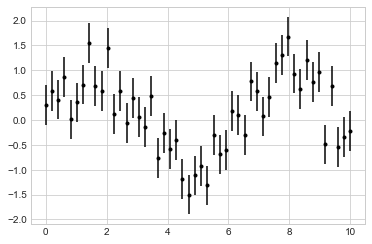

In [2]:
x = np.linspace(0, 10, 50)
dy = 0.4
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr = dy, fmt = '.k')

In [3]:
np.random.randn?

`fmt`是一种控制线条和点的外观的代码格式, 语法同`plt.plot()`

<ErrorbarContainer object of 3 artists>

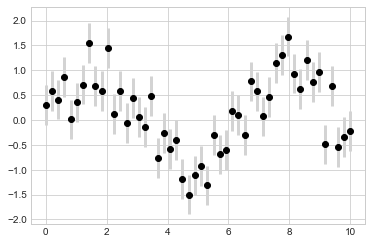

In [4]:
plt.errorbar(x, y, yerr = dy, fmt = 'o', color = 'black', ecolor = 'lightgray', elinewidth = 3, capsize = 0)

## 2 | 连续误差线`fill_between`

e.g.

`plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color = 'gray', alpha = 0.2)`

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor

model = lambda x : x * np.sin(x)  # 模型
# 数据
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 高斯过程拟合结果
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis],return_std=True)
dyfit = 2 * np.sqrt(MSE)

(0, 10)

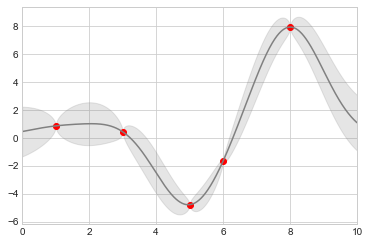

In [6]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color = 'gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color = 'gray', alpha = 0.2)
plt.xlim(0, 10)

# 密度图与等高线图

In [7]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

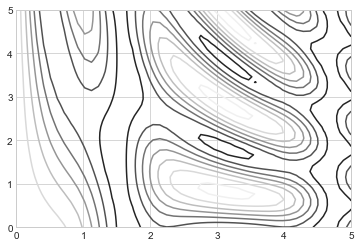

In [9]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

可以用不同颜色表示

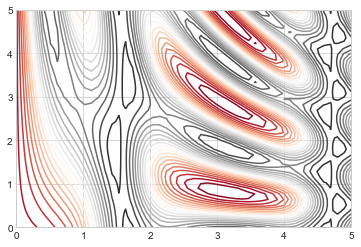

In [13]:
# 将数据范围等分为20份
plt.contour(X, Y, Z, 20, cmap = 'RdGy')  # RdGy为红灰配色方案

使用`plt.contourf()`填充等高线图

使用`plt.colorbar()`颜色标签信息条

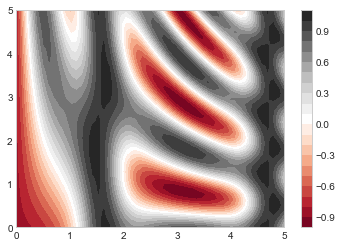

In [16]:
plt.contourf(X, Y, Z, 20, cmap = 'RdGy')
plt.colorbar()

利用`imshow()`将二维数组渲染成渐变图

extent: `[xmin, xmax, ymin, ymax]`

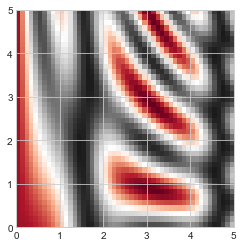

In [17]:
plt.imshow(Z, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'RdGy')

将等高线图和彩色图组合, 加入数据标签: 

**组合**: 使用背景色半透明的彩色图和坐标轴相同,带数据标签的等高线图组合在一起

**标签**: 使用`plt.clabel`

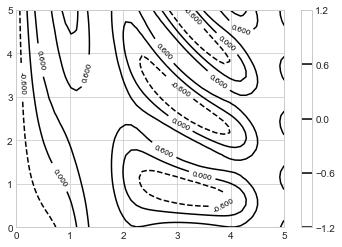

In [19]:
contours = plt.contour (X, Y, Z, 3, colors = 'black')
plt.clabel(contours, inline = True, fontsize = 8)
# plt.imshow(Z, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'RdGy', alpha = 0.5)
plt.colorbar()

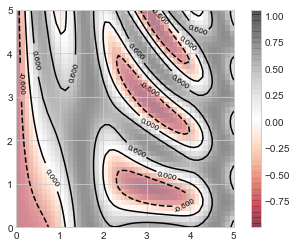

In [20]:
contours = plt.contour (X, Y, Z, 3, colors = 'black')
plt.clabel(contours, inline = True, fontsize = 8)
plt.imshow(Z, extent = [0, 5, 0, 5], origin = 'lower', cmap = 'RdGy', alpha = 0.5)
plt.colorbar()

小结: **`plt.imshow`, `plt.contourf`, `plt.contour`三者组合后, 打开了用二维数据画三维图的多种可能**